#**EDA!**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# INCOME/DSCI/TEMP/PRECIP DATA

In [56]:
data = pd.read_csv('income-dsci-temp-data.csv')

In [57]:
by_county = data.groupby('County')

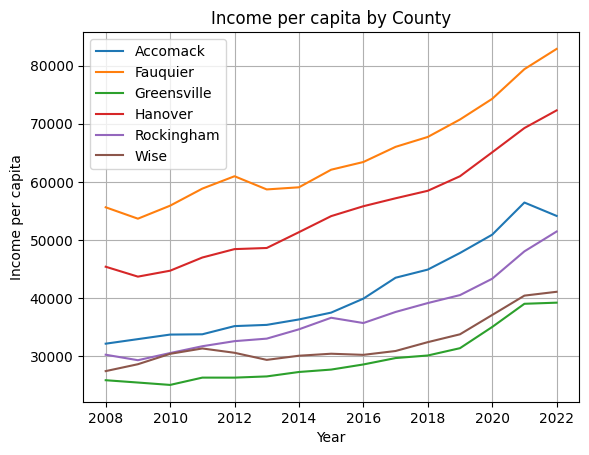

In [58]:
for category, county in by_county:
    plt.plot(county['Year'], county['Income'], label=category)

plt.xlabel('Year')
plt.ylabel('Income per capita')
plt.title('Income per capita by County')
plt.legend()
plt.grid()
plt.show()

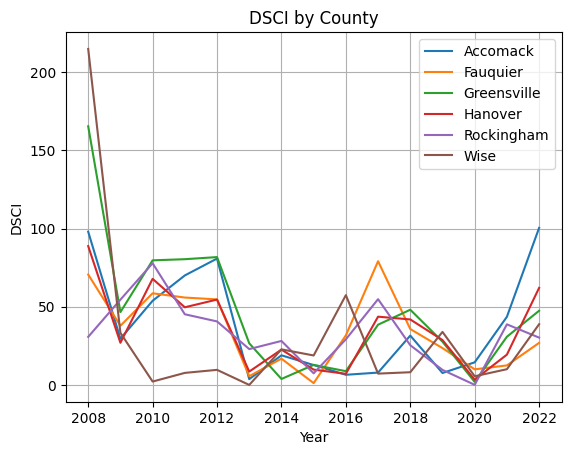

In [59]:
for category, county in by_county:
    plt.plot(county['Year'], county['DSCI'], label=category)

plt.xlabel('Year')
plt.ylabel('DSCI')
plt.title('DSCI by County')
plt.legend()
plt.grid()
plt.show()

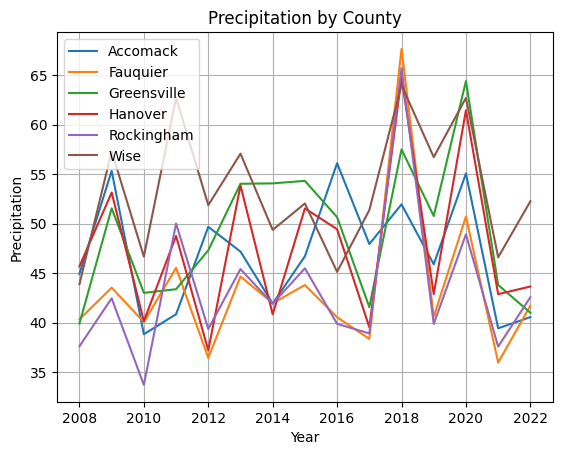

In [60]:
for category, county in by_county:
    plt.plot(county['Year'], county['Precip'], label=category)

plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.title('Precipitation by County')
plt.legend()
plt.grid()
plt.show()

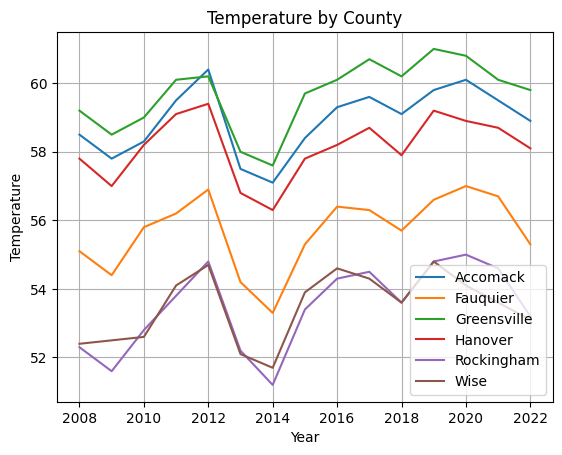

In [61]:
for category, county in by_county:
    plt.plot(county['Year'], county['Temp'], label=category)

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature by County')
plt.legend()
plt.grid()
plt.show()

# CROP DATA

In [8]:
crop_data = pd.read_csv('crop_data.csv')

In [10]:
crop_replace_map = {
    'Corn': 'Agriculture',
    'Other_Hay/Non_Alfalfa': 'Agriculture',
    'Soybeans': 'Agriculture',
    'Alfalfa':'Agriculture',
    'Sorghum':'Agriculture',
    'Dbl_Crop_WinWht/Soybeans':'Agriculture',
    'Winter_Wheat':'Agriculture',
    'Dbl_Crop_WinWht/Corn':'Agriculture',
    'Millet':'Agriculture',
    'Dbl_Crop_Barley/Soybeans':'Agriculture',
    'Rye':'Agriculture',
    'Barley':'Agriculture',
    'Dbl_Crop_Soybeans/Oats ':'Agriculture',
    'Dbl_Crop_Barley/Corn':'Agriculture',
    'Other_Crops':'Agriculture',
    'Dbl_Crop_WinWht/Sorghum':'Agriculture',
    'Oats':'Agriculture',
    'Cotton':'Agriculture',
    'Apples':'Agriculture',
    'Pumpkins':'Agriculture',
    'Tobacco':'Agriculture',
    'Sunflower':'Agriculture',
    'Christmas_Trees':'Agriculture',
    'Triticale':'Agriculture',
    'Grapes':'Agriculture',
    'Sweet_Corn':'Agriculture',
    'Peanuts':'Agriculture',
    'Dry_Beans':'Agriculture',
    'Dbl_Crop_Oats/Corn':'Agriculture',
    'Potatoes':'Agriculture',
    'Peaches':'Agriculture',
    'Misc_Vegs_&_Fruits':'Agriculture',
    'Dbl_Crop_Barley/Sorghum':'Agriculture',
    'Sweet_Potatoes':'Agriculture',
    'Squash':'Agriculture',
    'Tomatoes':'Agriculture',
    'Strawberries':'Agriculture',
    'Broccoli':'Agriculture',
    'Watermelons':'Agriculture',
    'Other_Tree_Crops':'Agriculture',
    'Canola':'Agriculture',
    'Cantaloupes':'Agriculture',
    'Cabbage':'Agriculture',
    'Vetch':'Agriculture',
    'Walnuts':'Agriculture',
    'Rape_Seed':'Agriculture',
    'Dbl_Crop_WinWht/Cotton':'Agriculture',
    'Dbl_Crop_Corn/Soybeans':'Agriculture',
    'Cherries':'Agriculture',
    'Buckwheat':'Agriculture',
    'Dbl_Crop_Soybeans/Cotton':'Agriculture',
    'Switchgrass':'Agriculture',
    'Cucumbers':'Agriculture',
    'Cranberries':'Agriculture',
    'Pop_or_Orn_Corn':'Agriculture',
    'Radishes':'Agriculture',
    'Greens':'Agriculture',
    'Pears':'Agriculture',
    'Peppers':'Agriculture',
    'Pecans':'Agriculture',
    'Peas':'Agriculture',
    'Durum_Wheat':'Agriculture',
    'Gourds':'Agriculture',
    'Spring_Wheat':'Agriculture',
    'Speltz':'Agriculture',
    'Turnips':'Agriculture',

    'Grassland/Pasture': 'Grassland',
    'Sod/Grass_Seed': 'Grassland',
    'Switchgrass':'Grassland',

    'Mixed_Forest': 'Forest',
    'Evergreen_Forest': 'Forest',
    'Deciduous_Forest': 'Forest',

    'Barren': 'Barren',
    'Fallow/Idle_Cropland': 'Barren',

    'Developed/High_Intensity': 'Developed',
    'Developed/Med_Intensity': 'Developed',
    'Developed/Low_Intensity': 'Developed',
    'Developed/Open_Space': 'Developed',

    'Open_Water': 'Open_Water',
    'Shrubland': 'Shrubland',

    'Woody_Wetlands':'Wetlands',
    'Herbaceous_Wetlands':'Wetlands',

    'Aquaculture':'Aquaculture'

}

crop_data_grouped = crop_data
crop_data_grouped['Landuse'] = crop_data_grouped['Crop'].map(crop_replace_map)

<Figure size 1000x600 with 0 Axes>

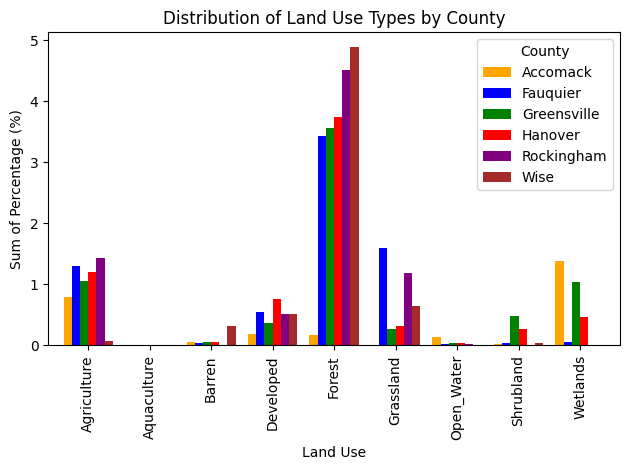

In [26]:
pivot_data = crop_data_grouped.pivot_table(index='Landuse', columns='County', values='Percentage', aggfunc='sum')

# Plotting
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', color=['orange', 'blue', 'green', 'red', 'purple', 'brown'], width = 0.8)
plt.xlabel('Land Use')
plt.ylabel('Sum of Percentage (%)')
plt.title('Distribution of Land Use Types by County')
plt.legend(title='County')
plt.tight_layout()
plt.show()

## Accomack County

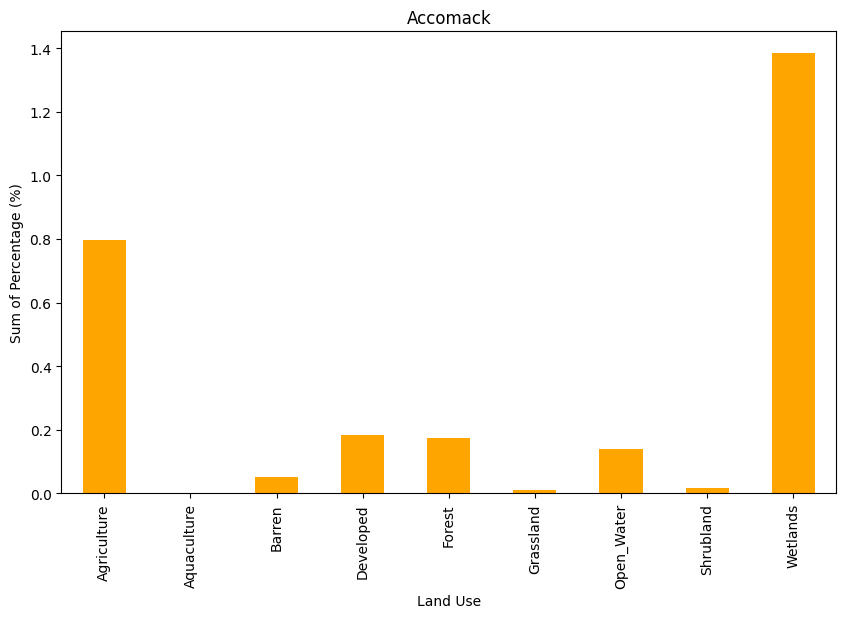

In [53]:
acc_data = crop_data_grouped[crop_data_grouped['County'] == 'Accomack']

landuse_percentages = acc_data.groupby('Landuse')['Percentage'].sum()

plt.figure(figsize=(10, 6))
landuse_percentages.plot(kind='bar', color='orange')
plt.xlabel('Land Use')
plt.ylabel('Sum of Percentage (%)')
plt.title('Accomack')
plt.show()

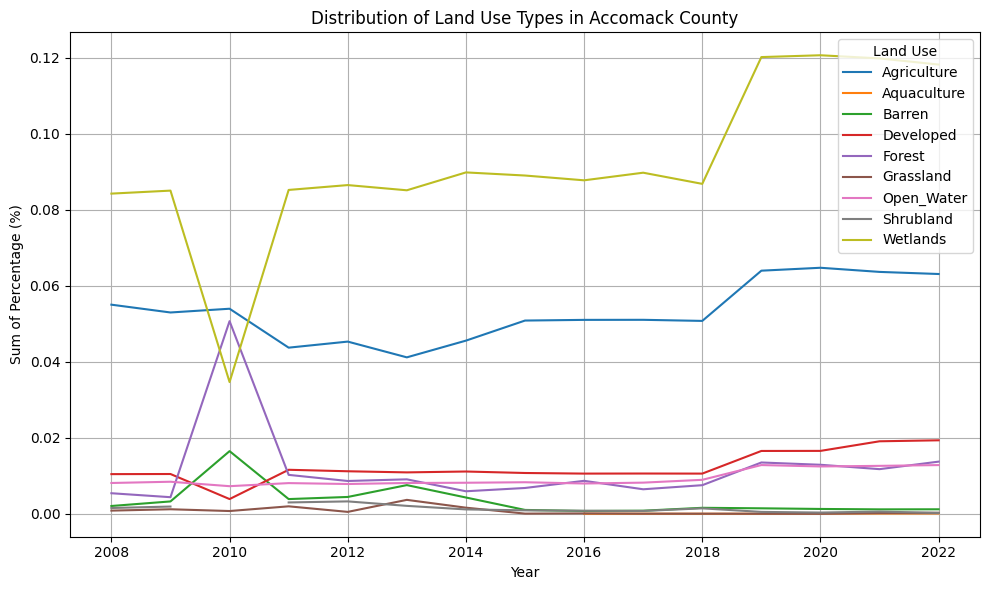

In [54]:
grouped_data = acc_data.groupby(['Year', 'Landuse'])['Percentage'].sum().unstack()

grouped_data.plot(kind='line', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Sum of Percentage (%)')
plt.title('Distribution of Land Use Types in Accomack County')
plt.legend(title='Land Use')
plt.grid(True)
plt.tight_layout()
plt.show()

## Greensville County

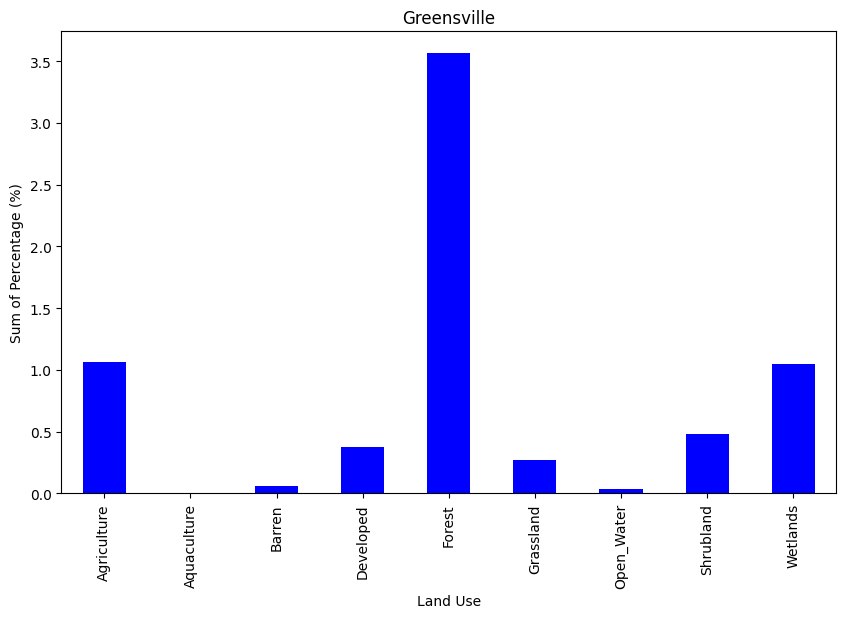

In [28]:
green_data = crop_data_grouped[crop_data_grouped['County'] == 'Greensville']

landuse_percentages = green_data.groupby('Landuse')['Percentage'].sum()

plt.figure(figsize=(10, 6))
landuse_percentages.plot(kind='bar', color='blue')
plt.xlabel('Land Use')
plt.ylabel('Sum of Percentage (%)')
plt.title('Greensville')
plt.show()

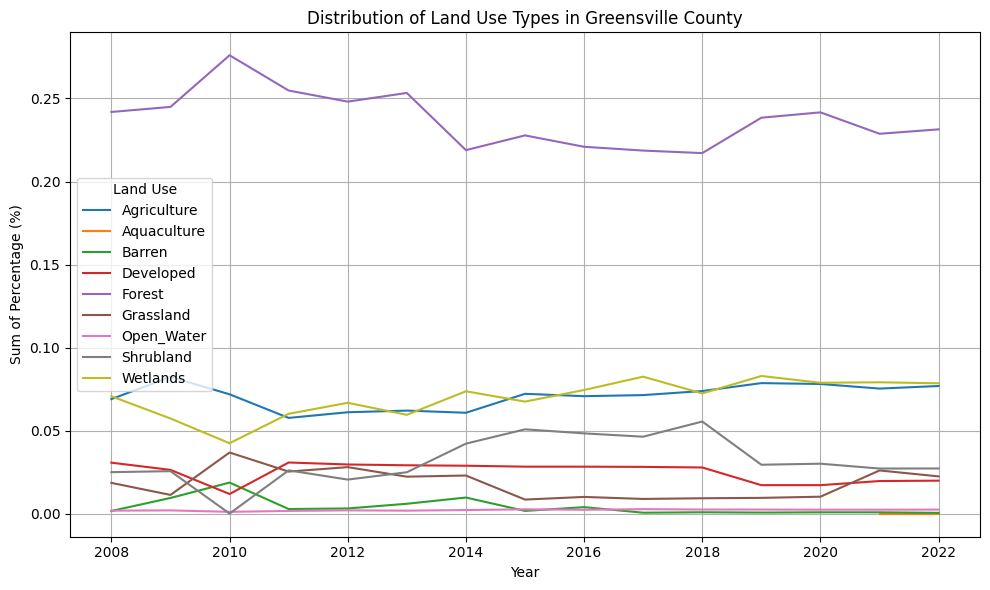

In [52]:
grouped_data = green_data.groupby(['Year', 'Landuse'])['Percentage'].sum().unstack()

grouped_data.plot(kind='line', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Sum of Percentage (%)')
plt.title('Distribution of Land Use Types in Greensville County')
plt.legend(title='Land Use')
plt.grid(True)
plt.tight_layout()
plt.show()

## Fauquier County

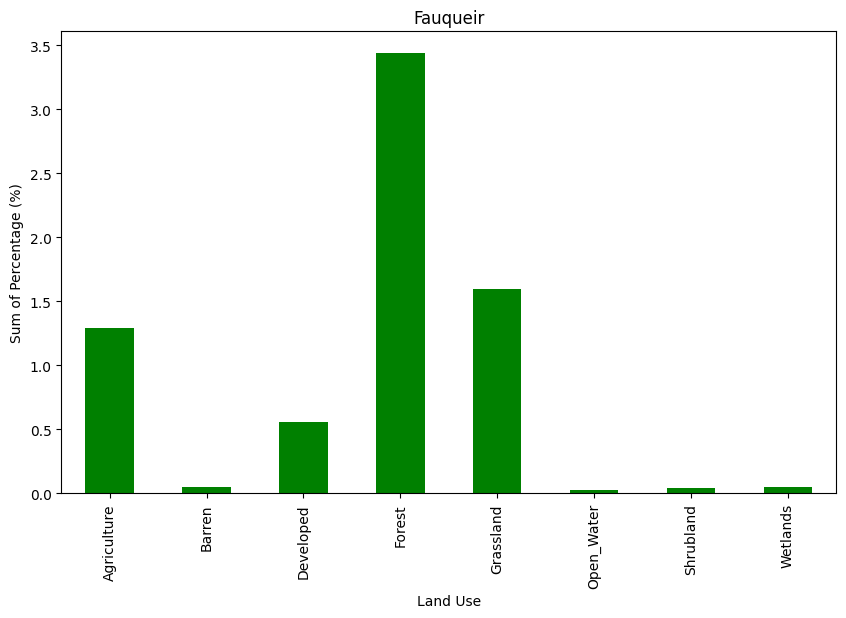

In [27]:
faq_data = crop_data_grouped[crop_data_grouped['County'] == 'Fauquier']

landuse_percentages = faq_data.groupby('Landuse')['Percentage'].sum()

plt.figure(figsize=(10, 6))
landuse_percentages.plot(kind='bar', color='green')
plt.xlabel('Land Use')
plt.ylabel('Sum of Percentage (%)')
plt.title('Fauqueir')
plt.show()

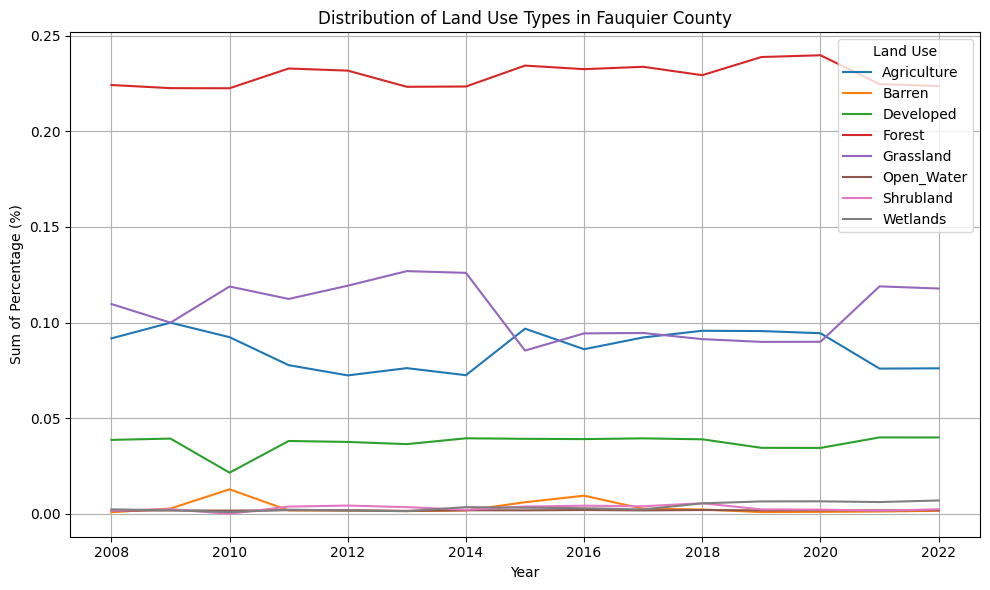

In [51]:
grouped_data = faq_data.groupby(['Year', 'Landuse'])['Percentage'].sum().unstack()

grouped_data.plot(kind='line', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Sum of Percentage (%)')
plt.title('Distribution of Land Use Types in Fauquier County')
plt.legend(title='Land Use')
plt.grid(True)
plt.tight_layout()
plt.show()

## Hanover County

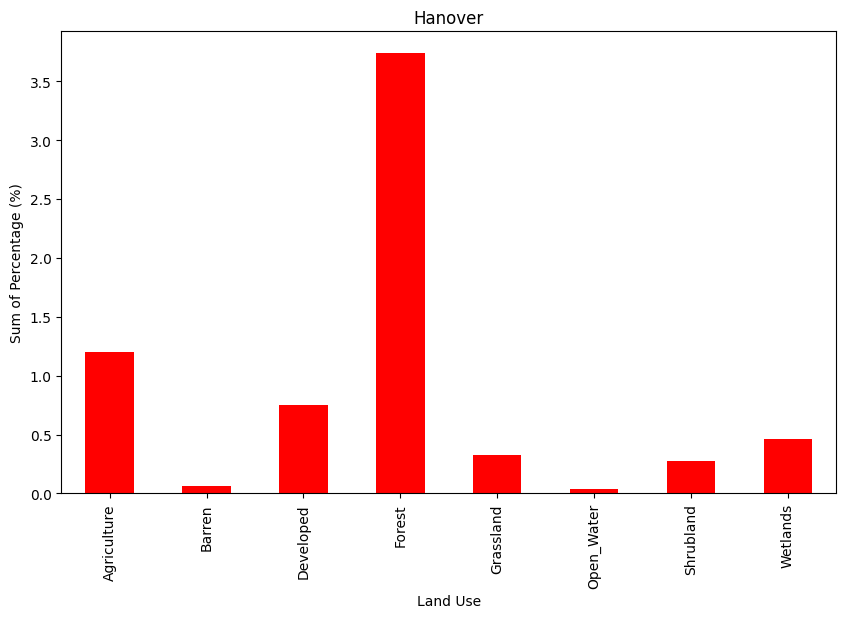

In [31]:
hanover_data = crop_data_grouped[crop_data_grouped['County'] == 'Hanover']

landuse_percentages = hanover_data.groupby('Landuse')['Percentage'].sum()

plt.figure(figsize=(10, 6))
landuse_percentages.plot(kind='bar', color='red')
plt.xlabel('Land Use')
plt.ylabel('Sum of Percentage (%)')
plt.title('Hanover')
plt.show()

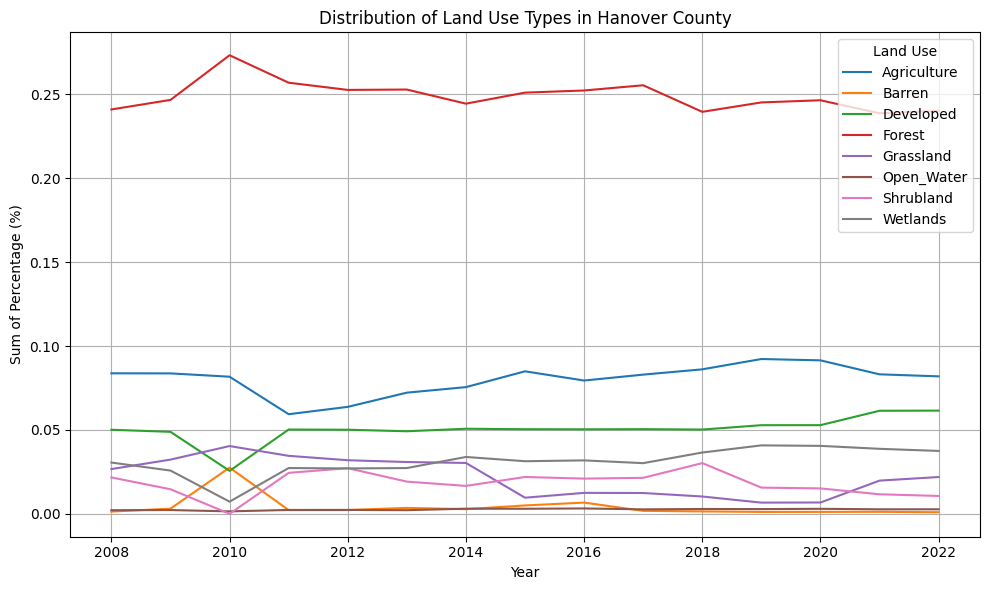

In [50]:
grouped_data = hanover_data.groupby(['Year', 'Landuse'])['Percentage'].sum().unstack()

grouped_data.plot(kind='line', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Sum of Percentage (%)')
plt.title('Distribution of Land Use Types in Hanover County')
plt.legend(title='Land Use')
plt.grid(True)
plt.tight_layout()
plt.show()

## Rockingham County

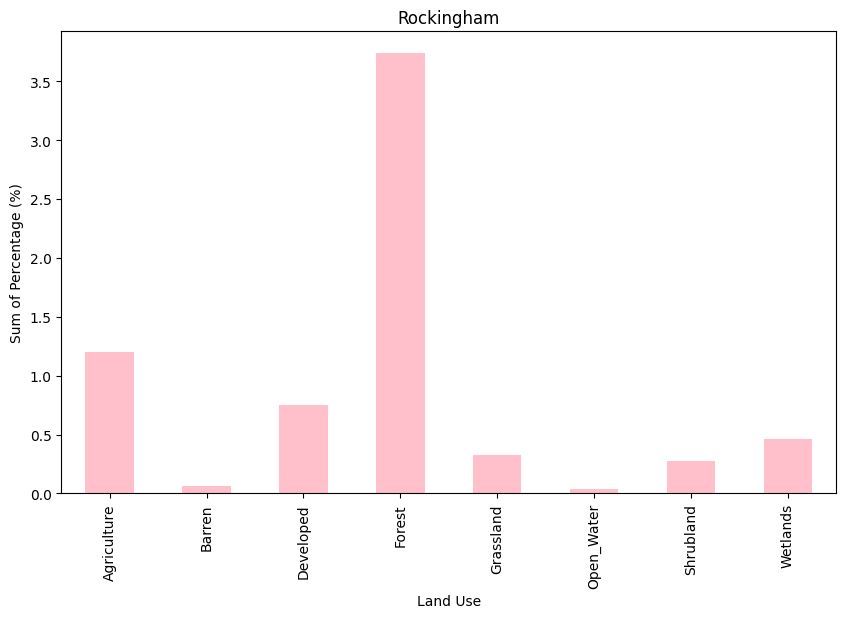

In [32]:
rock_data = crop_data_grouped[crop_data_grouped['County'] == 'Hanover']

landuse_percentages = rock_data.groupby('Landuse')['Percentage'].sum()

plt.figure(figsize=(10, 6))
landuse_percentages.plot(kind='bar', color='pink')
plt.xlabel('Land Use')
plt.ylabel('Sum of Percentage (%)')
plt.title('Rockingham')
plt.show()

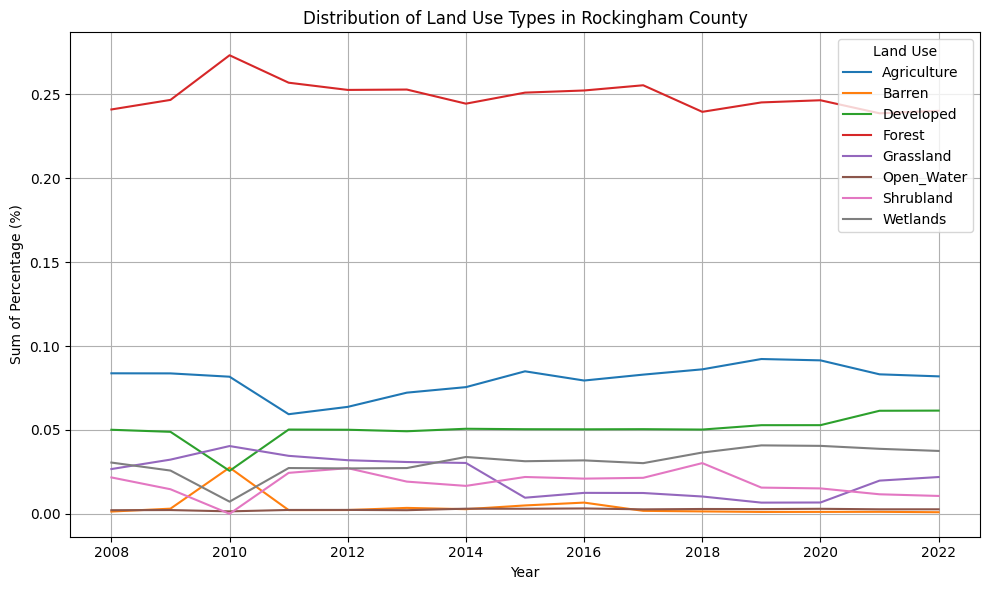

In [49]:
grouped_data = rock_data.groupby(['Year', 'Landuse'])['Percentage'].sum().unstack()

grouped_data.plot(kind='line', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Sum of Percentage (%)')
plt.title('Distribution of Land Use Types in Rockingham County')
plt.legend(title='Land Use')
plt.grid(True)
plt.tight_layout()
plt.show()

## Wise County

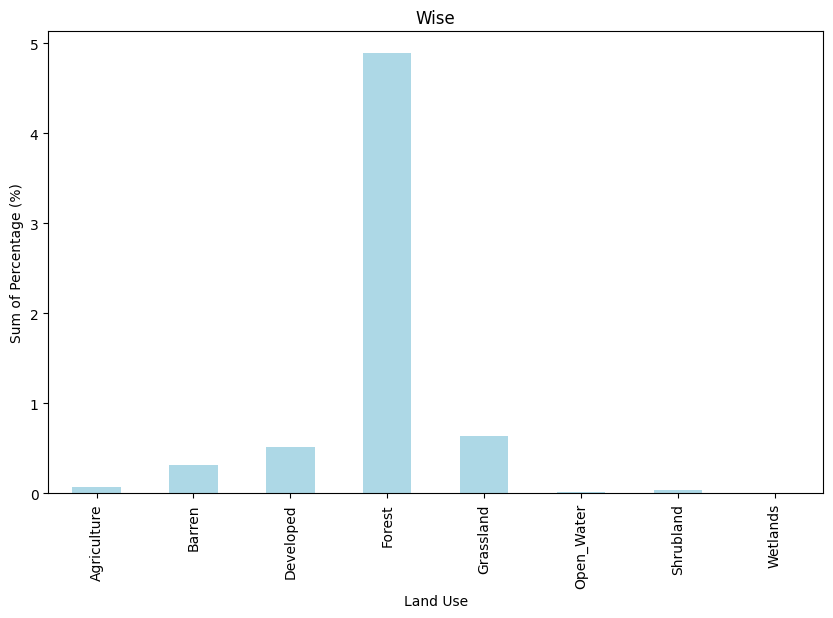

In [23]:
wise_data = crop_data_grouped[crop_data_grouped['County'] == 'Wise']

landuse_percentages = wise_data.groupby('Landuse')['Percentage'].sum()

plt.figure(figsize=(10, 6))
landuse_percentages.plot(kind='bar', color='lightblue')
plt.xlabel('Land Use')
plt.ylabel('Sum of Percentage (%)')
plt.title('Wise')
plt.show()

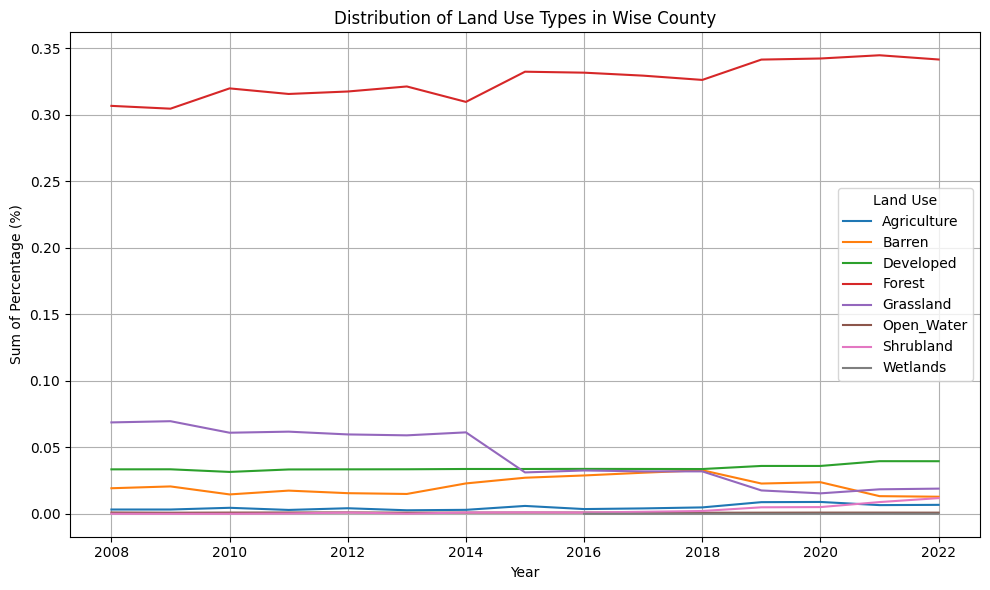

In [48]:
grouped_data = wise_data.groupby(['Year', 'Landuse'])['Percentage'].sum().unstack()

grouped_data.plot(kind='line', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Sum of Percentage (%)')
plt.title('Distribution of Land Use Types in Wise County')
plt.legend(title='Land Use')
plt.grid(True)
plt.tight_layout()
plt.show()

## By Year

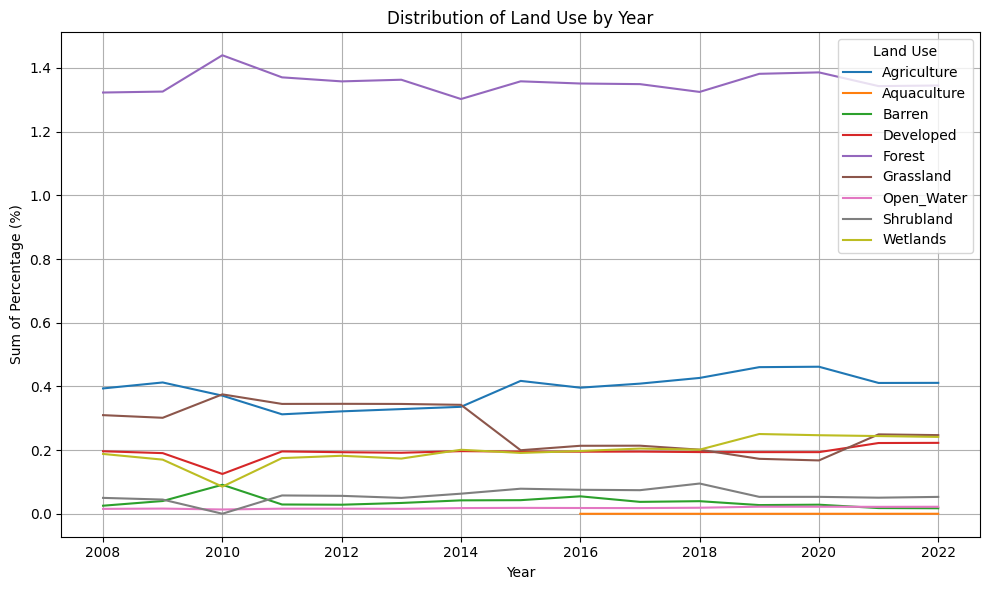

In [44]:
grouped_data = crop_data_grouped.groupby(['Year', 'Landuse'])['Percentage'].sum().unstack()

grouped_data.plot(kind='line', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Sum of Percentage (%)')
plt.title('Distribution of Land Use by Year')
plt.legend(title='Land Use')
plt.grid()
plt.tight_layout()
plt.show()

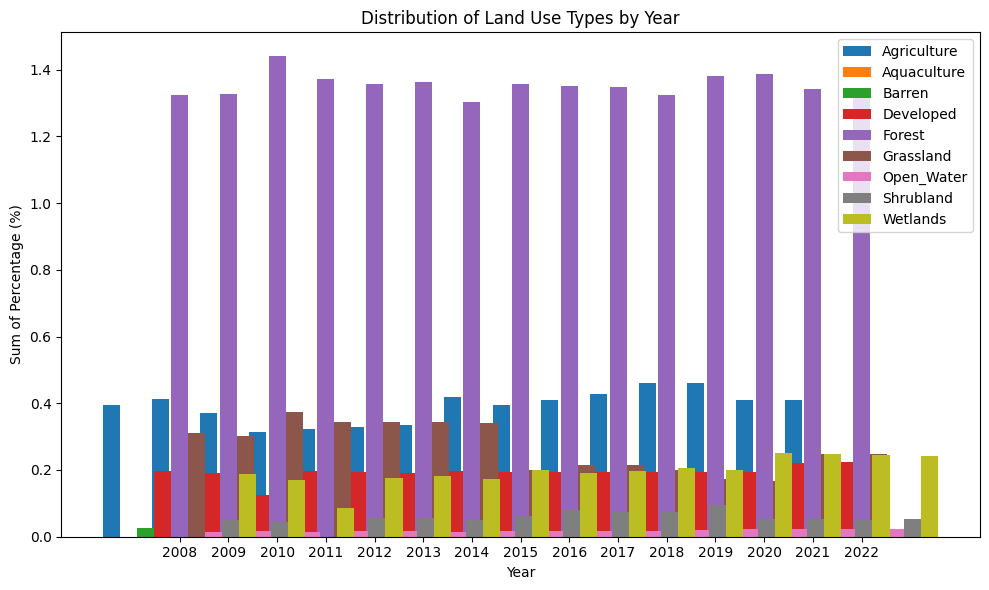

In [43]:
years = grouped_data.index
landuses = grouped_data.columns
yr_len= len(years)
land_len = len(landuses)

bar_width = 0.35
x = np.arange(yr_len)

fig, ax = plt.subplots(figsize=(10, 6))
for i, landuse in enumerate(landuses):
    ax.bar(x + i * bar_width, grouped_data[landuse], width=bar_width, label=landuse)

ax.set_xlabel('Year')
ax.set_ylabel('Sum of Percentage (%)')
ax.set_title('Distribution of Land Use Types by Year')
ax.set_xticks(x + bar_width * (land_len - 1) / 2)
ax.set_xticklabels(years)
ax.legend()
plt.tight_layout()
plt.show()